<a href="https://colab.research.google.com/github/asgarali429/Machine-learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

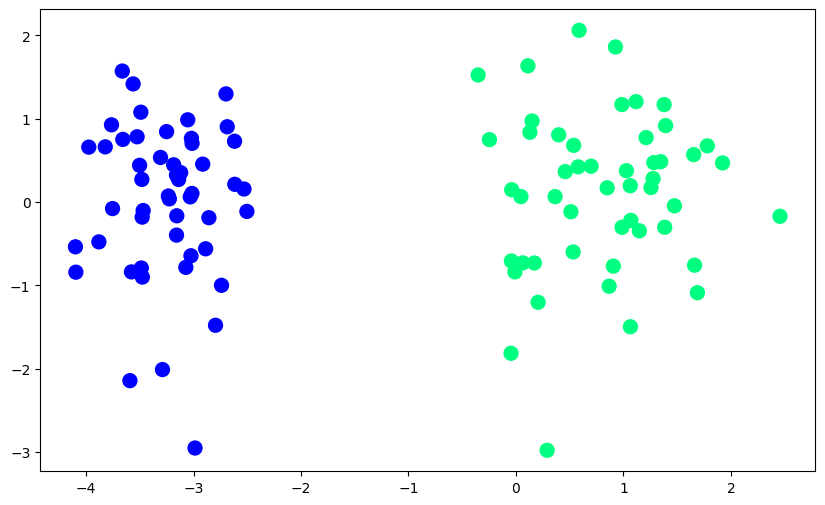

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def step(z):
  return 1 if z>0 else 0

In [5]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(1000):
    j = np.random.randint(0,100)
    yhat = step(np.dot(X[j],weights))
    weights = weights + lr *(y[j]- yhat)*X[j]

  return weights[0],weights[1:]

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(intercept_)
print(coef_)

1.3000000000000003
[1.05343617 0.2221512 ]


In [8]:
m = -(coef_[0]/coef_[1])        #m = -a / b
b = -(intercept_/coef_[1])      #b = c/b

In [9]:

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

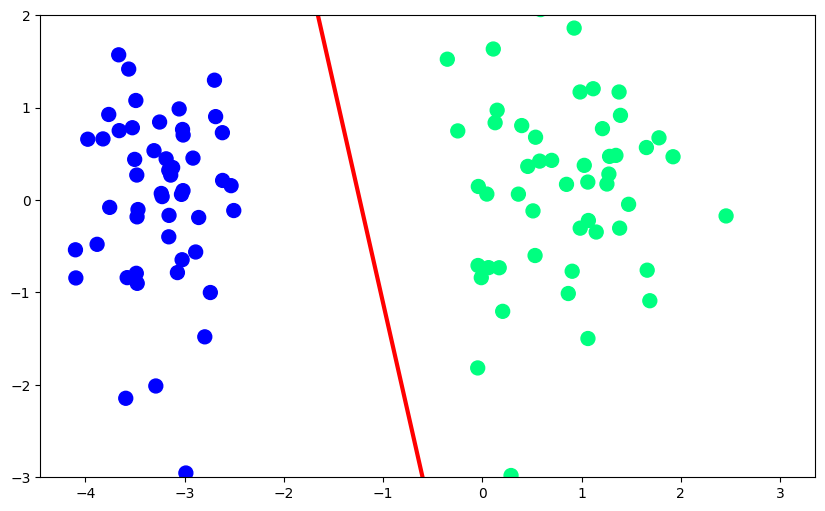

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [11]:

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [12]:

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [13]:

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

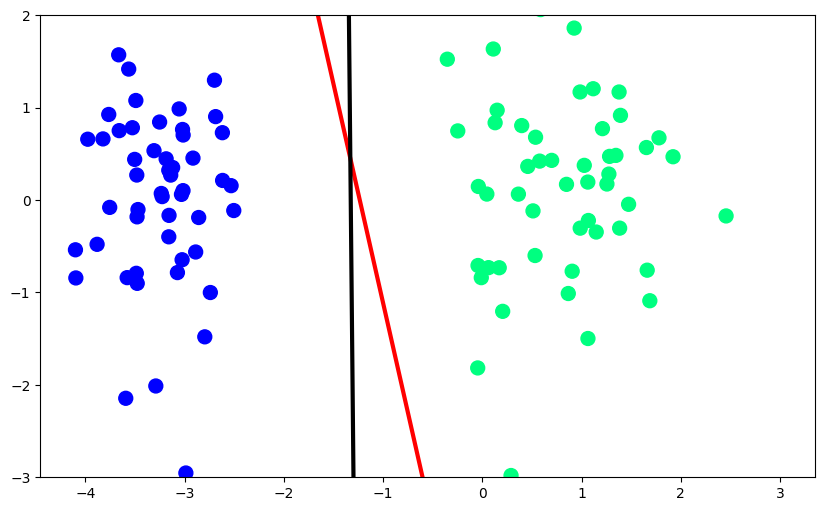

In [14]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [15]:
def sigmoid(z):
 return 1/(1 + np.exp(-z))

In [16]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 1

  for i in range(1000):
    j = np.random.randint(0,100)
    yhat = sigmoid(np.dot(X[j],weights))
    weights = weights + lr* (y[j]-yhat)*X[j]

  return weights[0],weights[1:]

In [17]:
intercept_,coef_ = perceptron(X,y)

In [18]:
print(intercept_)
print(coef_)

4.9740691984254495
[4.25889192 0.35421437]


In [19]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ /coef_[1])


In [20]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

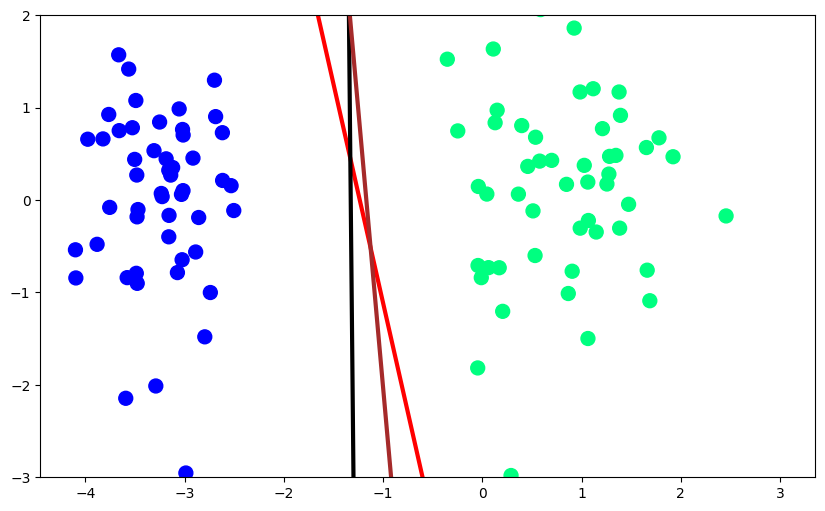

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [22]:
import random
def mini_batch_gd(X, y, batch_size=10):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):


        for j in range(X.shape[0]//batch_size):

            idx = random.sample(range(X.shape[0]),batch_size)

            y_hat = sigmoid(np.dot(X[idx], weights))

            gradient = np.dot((y[idx] - y_hat), X[idx]) / batch_size
            weights = weights + lr * gradient

    return weights[1:], weights[0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[[4.79786244 0.26745404]]
[4.6468708]


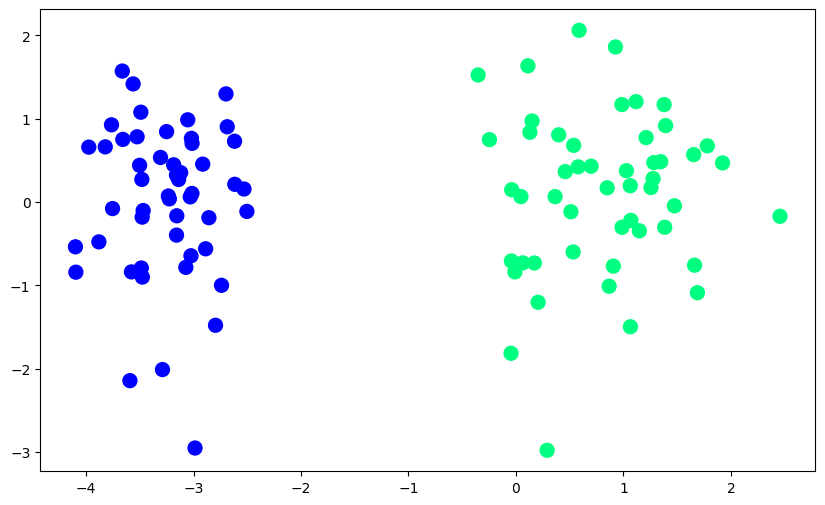

In [23]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

LogisticRegression(penalty='none', solver='sag')
print(lor.coef_)
print(lor.intercept_)

m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [24]:
def gd(X,y):

    # X = np.insert(X,0,1,axis=1)
    intercept_ = 1
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights)+intercept_)
        intercept_ = intercept_ + (lr* np.mean(y - y_hat))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    print(intercept_,weights)
    return intercept_,weights


In [25]:


coef_,intercept_ = gd(X,y)
# m = -(coef_[0]/coef_[1])
# b = -(intercept_/coef_[1])
# x_input1 = np.linspace(-3,3,100)
# y_input1 = m*x_input1 + b
# print(m,b)

5.83338864905325 [4.83926872 0.21182255]


In [32]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(500):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [33]:
coef_,intercept_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b
print(coef_,intercept_)

[2.48729004 0.1890049 ] 2.301021768306194


(-3.0, 2.0)

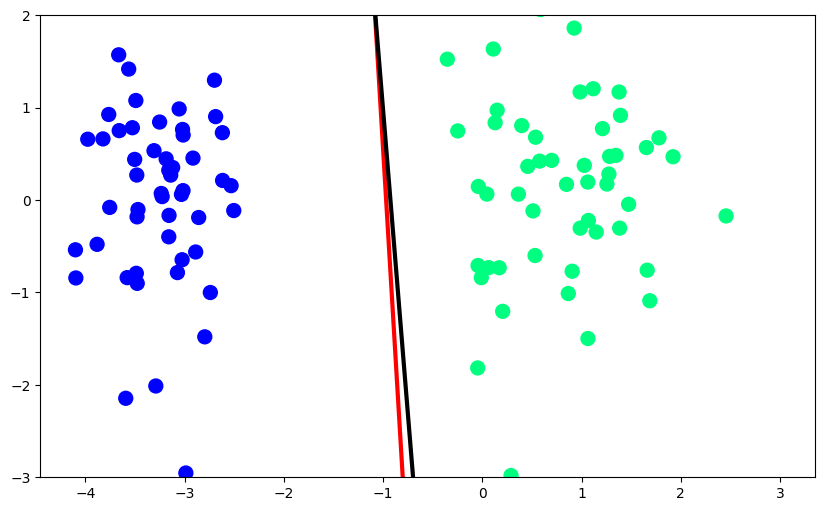

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

it is same as linear regression the difference is we apply sigmoid or softmax in yhat . and it is same as it linear regression .